In [1]:
import tensorflow as tf
tf.__version__

'2.14.0'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.backend import sigmoid
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Layer, Permute, multiply
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Conv1D, Dropout, Dense, BatchNormalization, AveragePooling1D, ReLU, LayerNormalization
from tensorflow.keras.layers import Bidirectional, LSTM, GRU, Lambda, Reshape, Flatten, SeparableConv1D, Activation, GlobalAveragePooling1D
from tensorflow.keras.layers import Input, Add, MaxPooling1D, MultiHeadAttention, concatenate
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.compat.v1.keras.models import load_model
import sklearn
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils import class_weight 

In [3]:
data_ndbi = pd.read_csv('D:/DL_DASCitarum/Spasial_Vector/DAS_Citarum_Extract_Landsat/Majalengka_Data/Refined_Extract_Majalengka/NDBI_final_Majalengka.csv')
data_ndvi = pd.read_csv('D:/DL_DASCitarum/Spasial_Vector/DAS_Citarum_Extract_Landsat/Majalengka_Data/Refined_Extract_Majalengka/NDVI_final_Majalengka.csv')
data_ndwi = pd.read_csv('D:/DL_DASCitarum/Spasial_Vector/DAS_Citarum_Extract_Landsat/Majalengka_Data/Refined_Extract_Majalengka/NDWI_final_Majalengka.csv')

In [4]:
print(data_ndbi.shape)

(150, 38)


In [5]:
data_ndbi_ = data_ndbi.values
data_ndvi_ = data_ndvi.values
data_ndwi_ = data_ndwi.values

ndbi_pd = pd.DataFrame(data_ndbi_)
ndvi_pd = pd.DataFrame(data_ndvi_)
ndwi_pd = pd.DataFrame(data_ndwi_)

ndbi_pd  = ndbi_pd.iloc[:,2:42].astype(float)
ndvi_pd  = ndvi_pd.iloc[:,2:42].astype(float)
ndwi_pd  = ndwi_pd.iloc[:,2:42].astype(float)

data_ndbi_int = ndbi_pd.interpolate(method='spline', order=3, limit_direction='both', axis=1)
data_ndvi_int = ndvi_pd.interpolate(method='spline', order=3, limit_direction='both', axis=1)
data_ndwi_int = ndwi_pd.interpolate(method='spline', order=3, limit_direction='both', axis=1)

In [6]:
print(data_ndbi_int.shape)
print(data_ndvi_int.shape)
print(data_ndwi_int.shape)

(150, 36)
(150, 36)
(150, 36)


In [7]:
comb_all = pd.concat([data_ndbi_int, data_ndvi_int,data_ndwi_int], axis =0, ignore_index=True)

In [8]:
y = data_ndbi.iloc[:,1]
y = np.asarray(y).astype(np.float32)
y_cat = to_categorical(y)
y_cat = y_cat[:,1:6] # num_class + 1

In [9]:
print(y.shape)

(150,)


In [10]:
print(y_cat)
print(y_cat.shape)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0.

In [11]:
print(np.unique(y))

[1. 2. 3. 4. 5.]


In [12]:
class_weights = compute_class_weight(class_weight = "balanced",
                                      classes = np.unique(y), y=y)
class_weights = dict(enumerate(class_weights))
# class_weights = dict(zip(np.unique(train_classes), class_weights))
print(class_weights)

{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0}


In [13]:
comb_ndbi = comb_all.iloc[0:150:,:]
comb_ndvi = comb_all.iloc[150:300:,:]
comb_ndwi = comb_all.iloc[300:450:,:]

comb_ndbi= np.asarray(comb_ndbi).astype(np.float64)
comb_ndvi= np.asarray(comb_ndvi).astype(np.float64)
comb_ndwi= np.asarray(comb_ndwi).astype(np.float64)

In [14]:
print(comb_all.shape)

(450, 36)


In [15]:
comb_stack = np.stack((comb_ndbi, comb_ndvi,
                       comb_ndwi), axis=1)

comb_stack_reshape = comb_stack.reshape(comb_stack.shape[0], comb_stack.shape[2], comb_stack.shape[1])
print(comb_stack_reshape.shape)

X_train, X_test, y_train, y_test = train_test_split(comb_stack_reshape , y_cat, test_size=0.30, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(150, 36, 3)
(105, 36, 3) (105, 5) (45, 36, 3) (45, 5)


In [16]:
# print(comb_cbi.shape)

In [17]:
# stack_ver = np.hstack((vert_cbi, vert_bsi, vert_evi2,
#                        vert_mndwi, vert_msavi, vert_nbr, 
#                        vert_ndvi))
# print(stack_ver.shape)

In [18]:
# import seaborn as sns 

# x = ['CBI','BSI','EVI2', 'MNDWI', 'MSAVI', 'NBR', 'NDVI']
# # enumerate label
# for i in enumerate(x):
#     print(i)

# # plot correlation matrix
# rf_pd = pd.DataFrame(data=stack_ver, columns=list(x))
# matrix = np.triu(rf_pd.corr())
# plt.figure(figsize=(12,8))
# sns.heatmap(rf_pd.corr(), annot=True, mask=matrix)

In [19]:
num_classes = len(np.unique(y))
input_shape=(X_train.shape[1], X_train.shape[2])
print(num_classes)
print(input_shape)

5
(36, 3)


In [20]:
def swish(x, beta = 1):
    return (x * sigmoid(beta * x))

tf.keras.utils.get_custom_objects().update({'swish': swish})

In [21]:
def ReshapeLayer(x):
    shape = x.shape
    # 1 possibility: H,W*channel
    reshape = Reshape((shape[1],shape[2]))(x)
    # 2 possibility: W,H*channel
    # transpose = Permute((2,1,3))(x)
    # reshape = Reshape((shape[1],shape[2]*shape[3]))(transpose)
    return reshape

In [22]:
def attention_block(inputs, output_shape):
    a = Permute((2, 1))(inputs)
    a = Dense(output_shape, activation='softmax')(a)
    a_probs = Permute((2, 1))(a)
    output_attention_mul = multiply([inputs, a_probs])
    return output_attention_mul

In [23]:
%%time
#Best set up

def make_model(input_shape):
    input_layer = Input(input_shape)
    
    x0a = Conv1D(64, 3, activation="swish", padding = 'same')(input_layer)
    x0a = Conv1D(64, 3, activation="swish", padding = 'same')(x0a)
    
    x01a = Conv1D(16, 3, activation="swish", padding = 'same')(x0a)
    x01a = Conv1D(16, 3, activation="swish", padding = 'same')(x01a)
    
    x02 = Conv1D(64, 3, activation="swish", padding = 'same')(x01a)
    x02 = Conv1D(64, 3, activation="swish", padding = 'same')(x02)
    
    add_1 = tf.keras.layers.add([x0a, x02])
    add_1 = LayerNormalization()(add_1)
    
    x03 = Conv1D(16, 3, activation="swish", padding = 'same')(add_1)
    
    x04 = Conv1D(64, 3, activation="swish", padding = 'same')(x03)
    x04 = Conv1D(64, 3, activation="swish", padding = 'same')(x04)
    x04 = LayerNormalization()(x04)
    
    xfin = Lambda(ReshapeLayer)(x04)
    xfin = Bidirectional(GRU(64, activation='tanh', return_sequences=False))(xfin)
    xfin = Dropout(0.5)(xfin)

    output_layer = Dense(num_classes, activation="softmax")(xfin)

    return Model(inputs=input_layer, outputs=output_layer)

model = make_model(input_shape= input_shape)
model.summary()
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=optimizers.AdamW(learning_rate=0.001), metrics=['accuracy'])

checkpoint = ModelCheckpoint(filepath='D:/DL_DASCitarum/Spasial_Vector/DAS_Citarum_Extract_Landsat/Saved_Model/LC_DAS_Citarum_exp03_stable_MajalengkaROI.h5',
                              monitor='val_accuracy',save_best_only=True,verbose=1)
early_stop = EarlyStopping(monitor='val_accuracy',patience=100,restore_best_weights=True,mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1,patience=30, min_lr=0.00001)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size =20,
                    epochs=500, callbacks = [checkpoint, early_stop, reduce_lr], 
                    class_weight=class_weights)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 36, 3)]              0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 36, 64)               640       ['input_1[0][0]']             
                                                                                                  
 conv1d_1 (Conv1D)           (None, 36, 64)               12352     ['conv1d[0][0]']              
                                                                                                  
 conv1d_2 (Conv1D)           (None, 36, 16)               3088      ['conv1d_1[0][0]']            
                                                                                              

D:\anaconda\envs\tf2.14\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/6 [========================>.....] - ETA: 0s - loss: 1.1732 - accuracy: 0.4900
Epoch 2: val_accuracy improved from 0.33333 to 0.62222, saving model to D:/DL_DASCitarum/Spasial_Vector/DAS_Citarum_Extract_Landsat/Saved_Model\LC_DAS_Citarum_exp03_stable_MajalengkaROI.h5
6/6 [==============================] - 1s 107ms/step - loss: 1.1682 - accuracy: 0.4952 - val_loss: 1.0532 - val_accuracy: 0.6222 - lr: 0.0010
Epoch 3/500
5/6 [========================>.....] - ETA: 0s - loss: 0.9682 - accuracy: 0.6000
Epoch 3: val_accuracy did not improve from 0.62222
6/6 [==============================] - 0s 38ms/step - loss: 0.9642 - accuracy: 0.5905 - val_loss: 0.9640 - val_accuracy: 0.5333 - lr: 0.0010
Epoch 4/500
5/6 [========================>.....] - ETA: 0s - loss: 0.9551 - accuracy: 0.6000
Epoch 4: val_accuracy did not improve from 0.62222
6/6 [==============================] - 0s 46ms/step - loss: 0.9489 - accuracy: 0.6000 - val_loss: 0.9864 - val_accuracy: 0.5333 - lr: 0.0010
Epoch 5/500
5/6 [=

Epoch 28/500
5/6 [========================>.....] - ETA: 0s - loss: 0.1828 - accuracy: 0.9500
Epoch 28: val_accuracy did not improve from 0.91111
6/6 [==============================] - 0s 38ms/step - loss: 0.1806 - accuracy: 0.9524 - val_loss: 0.3131 - val_accuracy: 0.8889 - lr: 0.0010
Epoch 29/500
5/6 [========================>.....] - ETA: 0s - loss: 0.1866 - accuracy: 0.9300
Epoch 29: val_accuracy did not improve from 0.91111
6/6 [==============================] - 0s 37ms/step - loss: 0.1995 - accuracy: 0.9238 - val_loss: 0.3172 - val_accuracy: 0.8889 - lr: 0.0010
Epoch 30/500
5/6 [========================>.....] - ETA: 0s - loss: 0.1551 - accuracy: 0.9700
Epoch 30: val_accuracy did not improve from 0.91111
6/6 [==============================] - 0s 38ms/step - loss: 0.1485 - accuracy: 0.9714 - val_loss: 0.3053 - val_accuracy: 0.8889 - lr: 0.0010
Epoch 31/500
5/6 [========================>.....] - ETA: 0s - loss: 0.1547 - accuracy: 0.9600
Epoch 31: val_accuracy did not improve from 0

6/6 [==============================] - 0s 38ms/step - loss: 0.0290 - accuracy: 0.9905 - val_loss: 0.2702 - val_accuracy: 0.9111 - lr: 1.0000e-04
Epoch 85/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0248 - accuracy: 0.9900
Epoch 85: val_accuracy did not improve from 0.93333
6/6 [==============================] - 0s 39ms/step - loss: 0.0239 - accuracy: 0.9905 - val_loss: 0.2713 - val_accuracy: 0.9111 - lr: 1.0000e-04
Epoch 86/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0313 - accuracy: 0.9900
Epoch 86: val_accuracy did not improve from 0.93333
6/6 [==============================] - 0s 38ms/step - loss: 0.0363 - accuracy: 0.9905 - val_loss: 0.2738 - val_accuracy: 0.9111 - lr: 1.0000e-04
Epoch 87/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0278 - accuracy: 1.0000
Epoch 87: val_accuracy did not improve from 0.93333
6/6 [==============================] - 0s 39ms/step - loss: 0.0272 - accuracy: 1.0000 - val_loss: 0.2823 - val_accuracy: 0.9333

Epoch 113/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0191 - accuracy: 1.0000
Epoch 113: val_accuracy did not improve from 0.93333
6/6 [==============================] - 0s 49ms/step - loss: 0.0188 - accuracy: 1.0000 - val_loss: 0.2748 - val_accuracy: 0.9111 - lr: 1.0000e-05
Epoch 114/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0265 - accuracy: 1.0000
Epoch 114: val_accuracy did not improve from 0.93333
6/6 [==============================] - 0s 50ms/step - loss: 0.0255 - accuracy: 1.0000 - val_loss: 0.2746 - val_accuracy: 0.9111 - lr: 1.0000e-05
Epoch 115/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0191 - accuracy: 1.0000
Epoch 115: val_accuracy did not improve from 0.93333
6/6 [==============================] - 0s 49ms/step - loss: 0.0185 - accuracy: 1.0000 - val_loss: 0.2747 - val_accuracy: 0.9111 - lr: 1.0000e-05
Epoch 116/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0202 - accuracy: 1.0000
Epoch 116: val_accuracy di

CPU times: total: 1min 35s
Wall time: 44.8 s


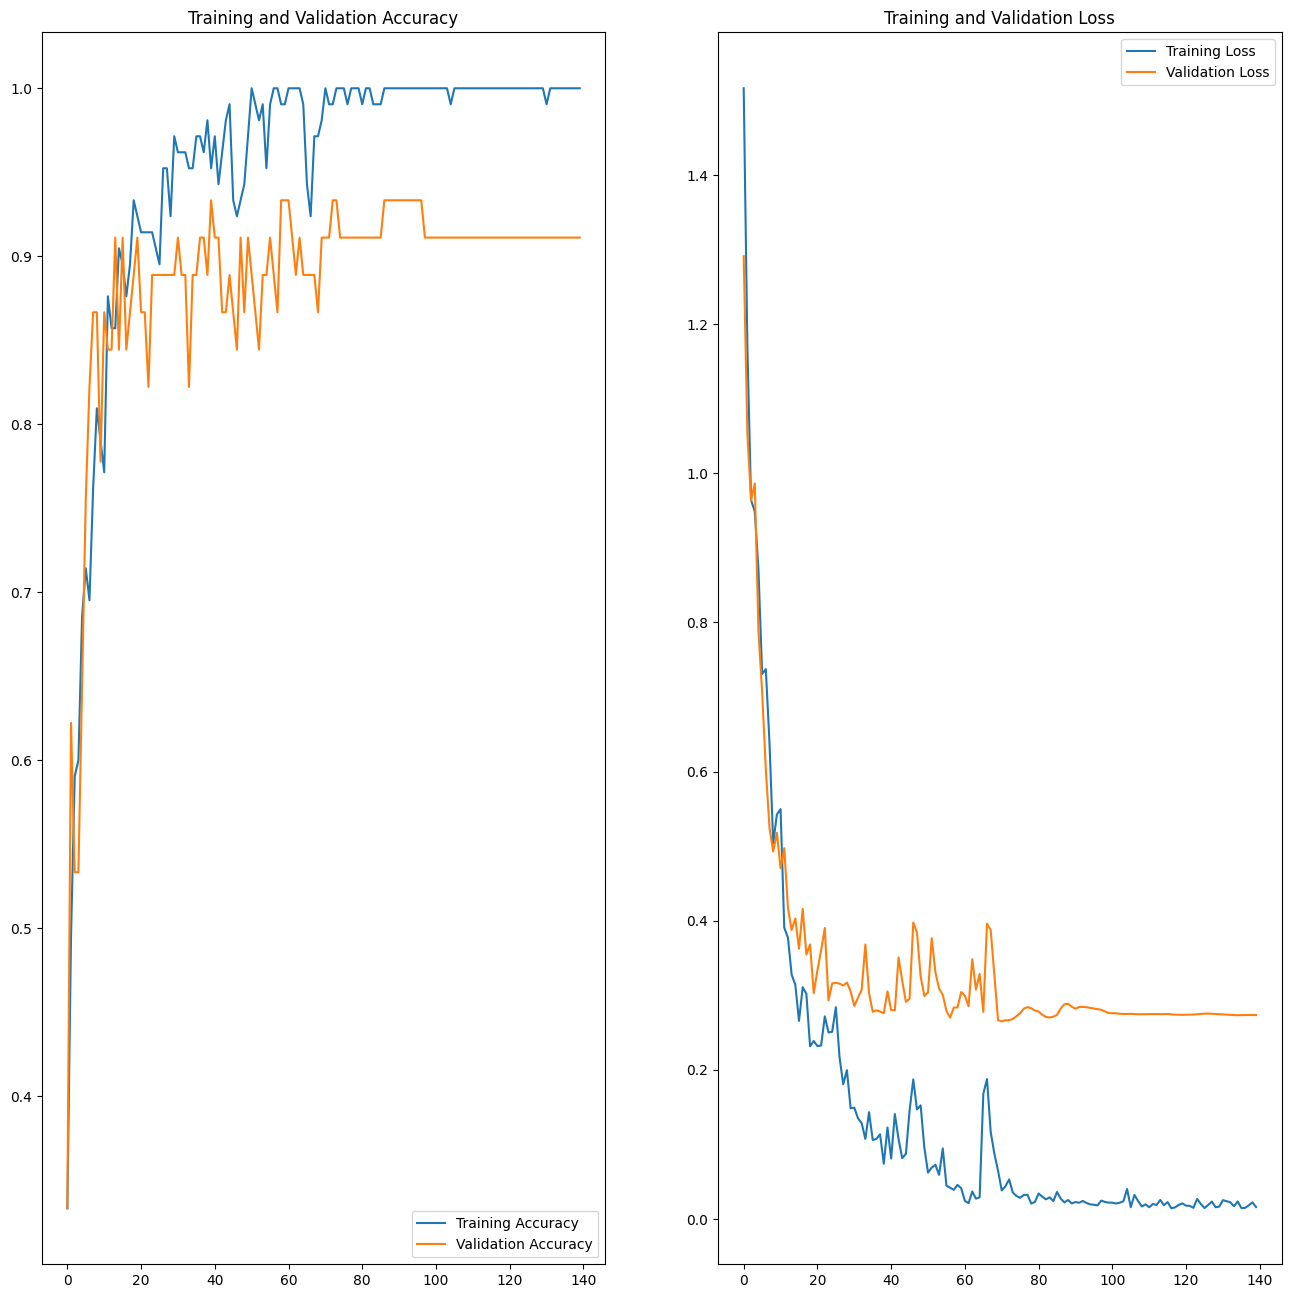

In [24]:
n_epochs = len(history.history['loss'])

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(n_epochs) #change it based on epoch needed to finish building the model

plt.figure(figsize=(16, 16))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

2/2 [==============================] - 1s 11ms/step


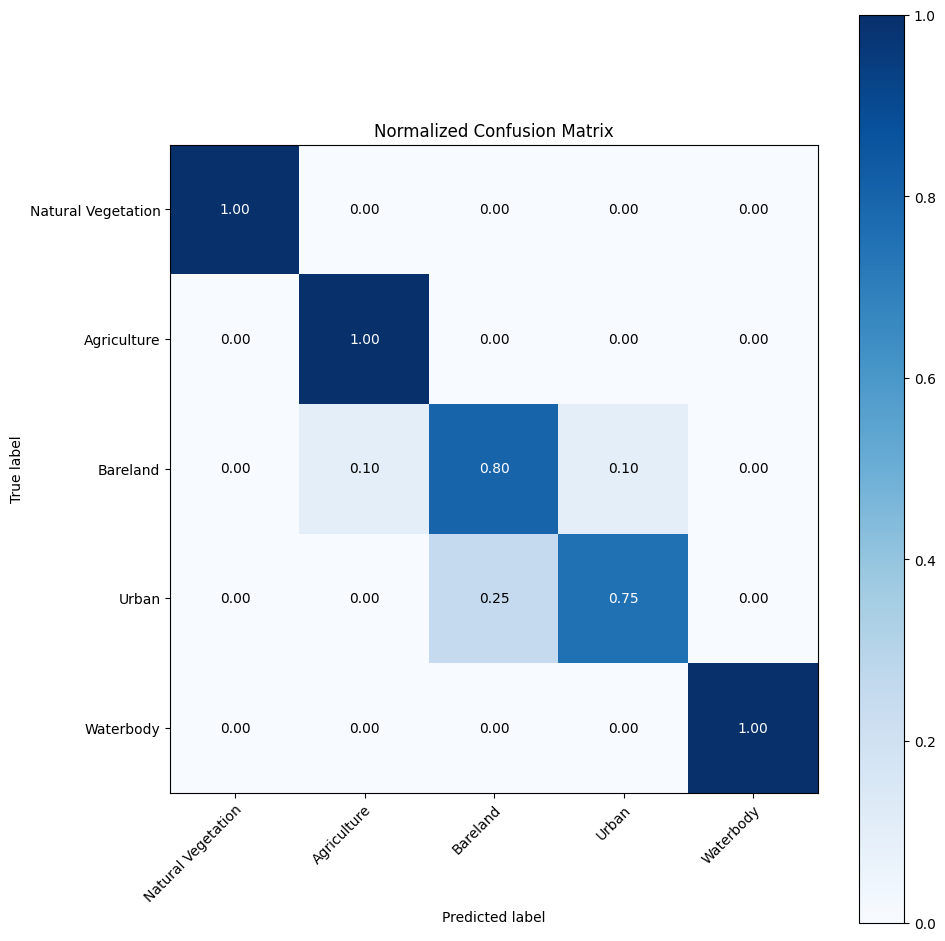

In [25]:
#confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

labels, counts = np.unique(y, return_counts=True)
labels = labels -1
classes = ['Natural Vegetation','Agriculture', 'Bareland', 'Urban', 'Waterbody']

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
score = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred, labels=labels)

# plot the confusion matrix of LGB
dl_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(dl_cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)


# Show all labels
ax.set(xticks=np.arange(dl_cm.shape[1]),
        yticks=np.arange(dl_cm.shape[0]),
        # ... and label them with the respective list entries
        xticklabels=classes, yticklabels=classes,
        title='Normalized Confusion Matrix',
        ylabel='True label',
        xlabel='Predicted label')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
          rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
fmt = '.2f'
thresh = dl_cm.max() / 2.
for i in range(dl_cm.shape[0]):
    for j in range(dl_cm.shape[1]):
        ax.text(j, i, format(dl_cm[i, j], fmt),
                ha="center", va="center",
                color="white" if dl_cm[i, j] > thresh else "black")
fig.tight_layout()

In [26]:
#Metric Precision, Recall, F-score support
from sklearn.metrics import precision_recall_fscore_support

y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)

macro_01 = precision_recall_fscore_support(y_test, y_pred, average='macro')
weighted_01 = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print(macro_01)
print(weighted_01)

2/2 [==============================] - 0s 10ms/step
(0.9077777777777778, 0.9099999999999999, 0.9078947368421053, None)
(0.9330864197530866, 0.9333333333333333, 0.9321637426900584, None)


In [27]:
#Metric F1-score
from sklearn.metrics import f1_score

macro_02 = f1_score(y_test, y_pred, average='macro')
weighted_02 = f1_score(y_test, y_pred, average='weighted')

print(macro_02)
print(weighted_02)

0.9078947368421053
0.9321637426900584


In [28]:
# Print the precision and recall, among other metrics
from sklearn import metrics
from tensorflow.compat.v1.keras.models import load_model

# model = load_model('D:/Wiltang_2022/Paper_Data_Codes/Saved_Model/LC_Multivariate_Wonosobo_BiGRU_exp_ver01_metricmeasurement.h5')
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)
# y_test = y_test.argmax(axis=1)

print(metrics.classification_report(y_test, y_pred, digits=4))

2/2 [==============================] - 0s 14ms/step
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        13
           1     0.9000    1.0000    0.9474         9
           2     0.8889    0.8000    0.8421        10
           3     0.7500    0.7500    0.7500         4
           4     1.0000    1.0000    1.0000         9

    accuracy                         0.9333        45
   macro avg     0.9078    0.9100    0.9079        45
weighted avg     0.9331    0.9333    0.9322        45



In [29]:
import numpy as np
from sklearn.metrics import jaccard_score

y_pred_train = model.predict(X_train)
y_pred_train = y_pred_train.argmax(axis=1)
y_train = y_train.argmax(axis=1)

JS_test = jaccard_score(y_test, y_pred, average='macro')
JS_train = jaccard_score(y_train, y_pred_train, average='macro')
print(JS_test)
print(JS_train)

4/4 [==============================] - 0s 13ms/step
0.8454545454545453
0.9657142857142856


In [30]:
import numpy as np
from sklearn.metrics import jaccard_score

y_pred_train = model.predict(X_train)
y_pred_train = y_pred_train.argmax(axis=1)
# y_train = y_train.argmax(axis=1)

JS_test = jaccard_score(y_test, y_pred, average=None)
JS_train = jaccard_score(y_train, y_pred_train, average=None)
print(JS_test)
print(JS_train)

4/4 [==============================] - 0s 10ms/step
[1.         0.9        0.72727273 0.6        1.        ]
[1.         1.         0.9        0.92857143 1.        ]


In [31]:
from sklearn.metrics import cohen_kappa_score

model_kappa = cohen_kappa_score(y_pred, y_test)
print(model_kappa)

0.9145028499050032


In [ ]:
# data_test = {'ytest': y_test,
#         'ytest_pred': y_pred}

# data_train = {'ytest': y_train,
#         'ytest_pred': y_pred_train}

# df_test = pd.DataFrame(data_test)
# df_train = pd.DataFrame(data_train)

# df_test.to_csv('D:/DL_DASCitarum/Spasial_Vector/DAS_Citarum_Extract_Landsat/df_test.csv')
# df_train.to_csv('D:/DL_DASCitarum/Spasial_Vector/DAS_Citarum_Extract_Landsat/df_train.csv')

In [ ]:
# from tensorflow.keras.utils import plot_model
# import pydot
# import pydotplus
# from pydotplus import graphviz

# plot_model(model, to_file='D:/DL_DASCitarum/Spasial_Vector/DAS_Citarum_Extract_Landsat/Saved_Model/model3_plot.png', 
#            show_shapes=True, show_layer_names=True)